In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Matrice de données

In [2]:
K = np.array([[54861, 22559, 48293, 17078, 11491, 4407],
     [37317, 69373, 21693, 42371, 4342, 4029],
     [21291, 62736, 3874, 13186, 907, 1839],
     [17850, 48691, 5853, 17672, 2401, 4531],
     [17253, 8248, 4172, 1963, 328, 188],
     [12388, 18574, 2884, 4183, 0, 0],
     [41050, 94346, 20447, 43016, 6972, 7787],
     [726, 1779, 811, 2356, 15, 13],
     [37157, 38387, 26929, 29466, 2552, 1983],
     [15004, 24318, 8457, 11090, 5232, 5641]])

columns = ['L-H', 'L-F', 'M-H', 'M-F', 'D-H', 'D-F']
rows = ['Informatique', 'Science et vie', 'Langues', 'Droit', 'Génie civile', 'Administration', 'Sciences humaines', 'Sciences humaines', 'Gestion', 'Biologie']

df = pd.DataFrame(K, index=rows, columns=columns)

print(df)

                     L-H    L-F    M-H    M-F    D-H   D-F
Informatique       54861  22559  48293  17078  11491  4407
Science et vie     37317  69373  21693  42371   4342  4029
Langues            21291  62736   3874  13186    907  1839
Droit              17850  48691   5853  17672   2401  4531
Génie civile       17253   8248   4172   1963    328   188
Administration     12388  18574   2884   4183      0     0
Sciences humaines  41050  94346  20447  43016   6972  7787
Sciences humaines    726   1779    811   2356     15    13
Gestion            37157  38387  26929  29466   2552  1983
Biologie           15004  24318   8457  11090   5232  5641


### 1) Déterminer et afficher la matrice des fréquences relatives ainsi que les fréquences marginales.

In [58]:
total = K.sum()

# Frequency Matrix
F = K/total
print("Matrice des frequences: \n", F)
print("\n")

# Marginal frequencies
FiPlus = F.sum(axis=1)
FjPlus = F.sum(axis=0)

# Concatinating the marginals
step_1 = np.hstack((F,FiPlus.reshape(-1,1)))
step_2 = np.vstack((FjPlus.reshape(-1,1),np.array([1])))
total_matrix = np.vstack((step_1,step_2.T))
np.set_printoptions(precision=3, suppress=True)
print("The frequecny matrix including marginals: \n",total_matrix)

Matrice des frequences: 
 [[0.053 0.022 0.047 0.017 0.011 0.004]
 [0.036 0.067 0.021 0.041 0.004 0.004]
 [0.021 0.061 0.004 0.013 0.001 0.002]
 [0.017 0.047 0.006 0.017 0.002 0.004]
 [0.017 0.008 0.004 0.002 0.    0.   ]
 [0.012 0.018 0.003 0.004 0.    0.   ]
 [0.04  0.091 0.02  0.042 0.007 0.008]
 [0.001 0.002 0.001 0.002 0.    0.   ]
 [0.036 0.037 0.026 0.028 0.002 0.002]
 [0.015 0.024 0.008 0.011 0.005 0.005]]


The frequecny matrix including marginals: 
 [[0.053 0.022 0.047 0.017 0.011 0.004 0.153]
 [0.036 0.067 0.021 0.041 0.004 0.004 0.173]
 [0.021 0.061 0.004 0.013 0.001 0.002 0.1  ]
 [0.017 0.047 0.006 0.017 0.002 0.004 0.094]
 [0.017 0.008 0.004 0.002 0.    0.    0.031]
 [0.012 0.018 0.003 0.004 0.    0.    0.037]
 [0.04  0.091 0.02  0.042 0.007 0.008 0.207]
 [0.001 0.002 0.001 0.002 0.    0.    0.006]
 [0.036 0.037 0.026 0.028 0.002 0.002 0.132]
 [0.015 0.024 0.008 0.011 0.005 0.005 0.067]
 [0.246 0.376 0.139 0.176 0.033 0.029 1.   ]]


### 2) Déterminer et afficher les matrices des profils lignes et colonnes.

In [59]:
# profils lignes
XL = F.T/FiPlus
# profils colonnes
XC = F/FjPlus.T

print("Matrice profiles lignes: \n", XL)
print()
print("Matrice profiles colonnes: \n", XC)

Matrice profiles lignes: 
 [[0.346 0.208 0.205 0.184 0.537 0.326 0.192 0.127 0.272 0.215]
 [0.142 0.387 0.604 0.502 0.257 0.488 0.442 0.312 0.281 0.349]
 [0.304 0.121 0.037 0.06  0.13  0.076 0.096 0.142 0.197 0.121]
 [0.108 0.237 0.127 0.182 0.061 0.11  0.201 0.413 0.216 0.159]
 [0.072 0.024 0.009 0.025 0.01  0.    0.033 0.003 0.019 0.075]
 [0.028 0.022 0.018 0.047 0.006 0.    0.036 0.002 0.015 0.081]]

Matrice profiles colonnes: 
 [[0.215 0.058 0.337 0.094 0.336 0.145]
 [0.146 0.178 0.151 0.232 0.127 0.132]
 [0.084 0.161 0.027 0.072 0.026 0.06 ]
 [0.07  0.125 0.041 0.097 0.07  0.149]
 [0.068 0.021 0.029 0.011 0.01  0.006]
 [0.049 0.048 0.02  0.023 0.    0.   ]
 [0.161 0.243 0.143 0.236 0.204 0.256]
 [0.003 0.005 0.006 0.013 0.    0.   ]
 [0.146 0.099 0.188 0.162 0.075 0.065]
 [0.059 0.063 0.059 0.061 0.153 0.185]]


### Données en plus

In [60]:
# les poids
Di = np.diag(FiPlus)
Gi = np.sqrt(FjPlus.T)

Dj = np.diag(FjPlus)
Gj = np.sqrt(FiPlus)

(𝑿′𝑳)𝒊𝒋 = 𝒇𝒊𝒋 / (√𝒇+𝒋 × 𝒇𝒊+) = 𝟏/√𝒇+𝒋 * (𝒇𝒊𝒋 / 𝒇𝒊+).

(𝑿′𝑪)𝒊𝒋 = 𝒇𝒊𝒋 /(√𝒇𝒊+ × 𝒇+𝒋) = 𝟏/√𝒇𝒊+ * (𝒇𝒊𝒋 / 𝒇+𝒋).

In [68]:
# profils lignes transformés
XLprime = XL.T*(1/Gi)
# profils colonnes transformés
XCprime = XC.T*(1/Gj)
print("Matrice des profils lignes transformés: \n", XLprime)
print()
print("Matrice des profils colonnes transformés: \n", XCprime)

Matrice des profils lignes transformés: 
 [[0.696 0.232 0.817 0.256 0.398 0.162]
 [0.42  0.632 0.325 0.563 0.133 0.131]
 [0.413 0.985 0.1   0.302 0.048 0.103]
 [0.371 0.819 0.162 0.434 0.136 0.272]
 [1.081 0.418 0.348 0.145 0.056 0.034]
 [0.656 0.796 0.204 0.262 0.    0.   ]
 [0.387 0.72  0.257 0.48  0.179 0.213]
 [0.257 0.509 0.382 0.984 0.014 0.013]
 [0.548 0.459 0.53  0.514 0.103 0.085]
 [0.433 0.569 0.326 0.379 0.412 0.472]]

Matrice des profils colonnes transformés: 
 [[0.549 0.352 0.264 0.229 0.384 0.253 0.354 0.038 0.401 0.227]
 [0.148 0.429 0.509 0.409 0.12  0.249 0.534 0.062 0.272 0.241]
 [0.86  0.363 0.085 0.133 0.165 0.105 0.314 0.076 0.517 0.227]
 [0.239 0.558 0.228 0.316 0.061 0.12  0.519 0.174 0.445 0.234]
 [0.857 0.305 0.084 0.229 0.054 0.    0.448 0.006 0.205 0.588]
 [0.37  0.318 0.191 0.486 0.035 0.    0.563 0.006 0.179 0.714]]


In [71]:
# profils lignes transformés et centrés
YL = XLprime - Gi.T

# profils colonnes transformés et centrés
YC = XCprime - Gj

print("Matrice des profils lignes transformés et centrées: \n", YL)
print()
print("Matrice des profils colonnes transformés et centrées: \n", YC)

# Matrice d'inertie profils lignes
VI = YL.T @ Di @ YL
print("Matrice d'inertie profils lignes:  \n", VI)
# Matrice d'inertie profils colonnes
VJ = YC.T @ Dj @ YC
print("Matrice d'inertie profils colonnes:  \n", VJ)

Matrice des profils lignes transformés et centrées: 
 [[ 0.2   -0.381  0.445 -0.164  0.216 -0.01 ]
 [-0.077  0.018 -0.047  0.143 -0.049 -0.04 ]
 [-0.083  0.372 -0.272 -0.117 -0.134 -0.068]
 [-0.126  0.205 -0.21   0.014 -0.046  0.101]
 [ 0.585 -0.195 -0.024 -0.275 -0.126 -0.137]
 [ 0.16   0.183 -0.169 -0.158 -0.182 -0.171]
 [-0.109  0.107 -0.115  0.06  -0.003  0.041]
 [-0.24  -0.104  0.01   0.564 -0.167 -0.158]
 [ 0.052 -0.155  0.158  0.094 -0.079 -0.087]
 [-0.063 -0.045 -0.047 -0.041  0.23   0.3  ]]

Matrice des profils colonnes transformés et centrées: 
 [[ 0.158 -0.064 -0.053 -0.078  0.208  0.062 -0.1   -0.036  0.038 -0.033]
 [-0.244  0.012  0.192  0.103 -0.056  0.057  0.079 -0.013 -0.092 -0.019]
 [ 0.468 -0.053 -0.232 -0.173 -0.011 -0.087 -0.141  0.002  0.154 -0.033]
 [-0.153  0.142 -0.089  0.01  -0.115 -0.072  0.065  0.1    0.082 -0.025]
 [ 0.465 -0.111 -0.233 -0.077 -0.122 -0.192 -0.006 -0.068 -0.158  0.329]
 [-0.022 -0.098 -0.126  0.18  -0.141 -0.192  0.109 -0.068 -0.184  0.455]]

### 3) Afficher un tableau résumant les informations suivantes liées au nuage des profilslignes

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calcul de l'ACP pour les profils lignes
pca_XL = PCA()
pca_XL.fit(XL)

# Affichage des résultats
print("Valeurs propres de l'ACP_XL :")
print(pca_XL.explained_variance_)
print("\nTaux d'inertie de l'ACP_XL :")
print(pca_XL.explained_variance_ratio_)
print("\nTaux cumulés de l'information retenue :")
print(pca_XL.explained_variance_ratio_.cumsum())

Valeurs propres de l'ACP_XL :
[0.208 0.045 0.02  0.003 0.    0.   ]

Taux d'inertie de l'ACP_XL :
[0.753 0.163 0.073 0.011 0.    0.   ]

Taux cumulés de l'information retenue :
[0.753 0.916 0.989 1.    1.    1.   ]


### 4) Donner les axes principaux de l’ACP des profils-lignes et ceux de l’ACP des profilscolonnes.

In [77]:
print("Vecteurs propres de l'ACP_XL :")
print(pca_XL.components_)

# Calcul de l'ACP pour les profils colonnes
pca_XC = PCA()
pca_XC.fit(XC)

print()
print("Vecteurs propres de l'ACP_XC :")
print(pca_XC.components_)

Vecteurs propres de l'ACP_XL :
[[ 0.098  0.298  0.474  0.374  0.294  0.425  0.328  0.242  0.23   0.225]
 [ 0.504 -0.096 -0.216 -0.22   0.705  0.115 -0.155 -0.292  0.151 -0.025]
 [ 0.283  0.191 -0.355 -0.146 -0.061 -0.213  0.003  0.75   0.346 -0.067]
 [ 0.708 -0.006  0.213  0.017 -0.574 -0.024  0.066 -0.292  0.175  0.056]
 [ 0.207  0.196  0.218 -0.527 -0.01   0.27   0.122  0.228 -0.645 -0.196]
 [-0.002  0.732 -0.004  0.048 -0.009 -0.129 -0.567 -0.132 -0.118  0.304]]

Vecteurs propres de l'ACP_XC :
[[ 0.328  0.244  0.504  0.357  0.549  0.388]
 [ 0.094 -0.601  0.463 -0.454  0.316 -0.332]
 [-0.302 -0.155 -0.385 -0.407  0.428  0.623]
 [ 0.355  0.646 -0.096 -0.612  0.147 -0.227]
 [-0.48   0.174 -0.193  0.273  0.586 -0.533]
 [ 0.66  -0.328 -0.581  0.228  0.225 -0.126]]


### 5) Déterminer les Facteurs lignes (Composantes principales) correspondant aux axes du plan principal. On les note par : 𝜙𝑖 . Présenter les résultats dans un tableau. 

Facteurs lignes de l'ACP_XL :
[[ 0.265  0.375 -0.01  -0.047  0.     0.   ]
 [ 0.752 -0.174 -0.106  0.027  0.     0.   ]
 [-0.183  0.112  0.108  0.097 -0.002  0.   ]
 [ 0.027 -0.182  0.23  -0.05   0.001  0.   ]
 [-0.435 -0.049 -0.101 -0.     0.009  0.   ]
 [-0.427 -0.083 -0.122 -0.027 -0.008  0.   ]]


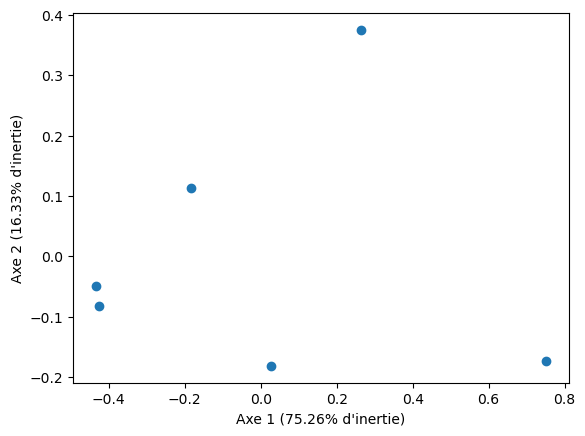

In [92]:
# Facteurs lignes apres projection
print("Facteurs lignes de l'ACP_XL :")
facteurLignes = pca_XL.transform(XL)
print(facteurLignes)


# Graphique
plt.scatter(pca_XL.transform(XL)[:, 0], pca_XL.transform(XL)[:, 1])
plt.xlabel("Axe 1 ({}% d'inertie)".format(round(pca_XL.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel("Axe 2 ({}% d'inertie)".format(round(pca_XL.explained_variance_ratio_[1] * 100, 2)))
plt.show()

### 6) Déterminer les contributions relatives et absolues des lignes sur chaque axe. Présenter les résultats obtenus dans deux tableaux. Un tableau pour chaque type de contribution. 

In [91]:
XC_PCA = pca_XC.transform(XC)

# Coordonnes des facteurs lignes 
factor_loadings = pca_XC.components_.T * np.sqrt(pca_XC.explained_variance_)

# Contributions relatives et absolues des lignes
contributions_rel = np.square(XC_PCA) / np.sum(np.square(XC_PCA), axis=0)
contributions_abs = np.dot(np.square(XC_PCA), np.square(factor_loadings)) / np.sum(np.square(XC_PCA), axis=0)

# Contributions relatives
print('Contributions relatives des lignes sur chaque axe principal:')
for i in range(len(XC)):
    print('Echantillon {}:'.format(i+1), contributions_rel[i])

# Contributions absolues
print('\nContributions absolues des lignes sur chaque axe principal:')
for i in range(len(XC)):
    print('Echantillon {}:'.format(i+1), contributions_abs[i])


Contributions relatives des lignes sur chaque axe principal:
Echantillon 1: [0.287 0.505 0.004 0.061 0.013 0.005]
Echantillon 2: [0.061 0.077 0.13  0.081 0.185 0.093]
Echantillon 3: [0.029 0.057 0.013 0.514 0.007 0.074]
Echantillon 4: [0.003 0.057 0.061 0.001 0.147 0.093]
Echantillon 5: [0.114 0.035 0.004 0.008 0.102 0.498]
Echantillon 6: [0.123 0.008 0.01  0.019 0.015 0.008]
Echantillon 7: [0.198 0.232 0.024 0.007 0.003 0.02 ]
Echantillon 8: [0.174 0.024 0.004 0.109 0.264 0.105]
Echantillon 9: [0.01  0.005 0.308 0.116 0.252 0.102]
Echantillon 10: [0.    0.    0.442 0.084 0.012 0.002]

Contributions absolues des lignes sur chaque axe principal:
Echantillon 1: [0.001 0.002 0.001 0.003 0.002 0.005]
Echantillon 2: [0.    0.    0.    0.001 0.001 0.001]
Echantillon 3: [0.    0.    0.    0.    0.    0.001]
Echantillon 4: [0. 0. 0. 0. 0. 0.]
Echantillon 5: [0.    0.    0.    0.001 0.001 0.002]
Echantillon 6: [0.    0.    0.    0.001 0.001 0.002]
Echantillon 7: [0.001 0.001 0.001 0.002 0.002 0

### 7) Déterminer les Facteurs colonnes du nuage des profils-colonnes. On les notera par 𝜓𝑖. 
### Afficher les résultats obtenus dans un tableau à deux colonnes. 

In [108]:
# verifier si les facteurs lignes sont normalises
variances = np.var(facteurLignes, axis=0)
print(variances)

# il faut normalises avant de calculer les facteurs colonnes
facteurs_lignes_centres = facteurLignes - np.mean(facteurLignes, axis=0)
facteurs_lignes_normalises = facteurs_lignes_centres / np.std(facteurs_lignes_centres, axis=0)

NewVariances = np.var(facteurs_lignes_normalises, axis=0)
print(NewVariances) # its working now => normalises!



# facteurs colonnes
facteurs_colonnes = np.dot(XC, facteurs_lignes_normalises)

# Tableau des facteurs colonnes
print("Facteurs colonnes :")
print("===================")
print("Nom de la colonne\tFacteur colonne")
for i in range(len(columns)):
    print(f"{columns[i]}\t\t{facteurs_colonnes[i]}")

[0.174 0.038 0.017 0.003 0.    0.   ]
[1. 1. 1. 1. 1. 1.]
Facteurs colonnes :
Nom de la colonne	Facteur colonne
L-H		[-0.399  0.325 -0.013  0.306  0.27  -0.282]
L-F		[ 0.096 -0.095  0.159 -0.051 -0.004  0.017]
M-H		[ 0.248 -0.067 -0.065 -0.044 -0.045  0.219]
M-F		[ 0.033 -0.125 -0.096 -0.095 -0.113  0.03 ]
D-H		[ 0.053  0.114  0.008 -0.01   0.002  0.075]
D-F		[ 0.11   0.041  0.015 -0.004 -0.002  0.105]


### 8) Reprenez la question 5) pour les profils colonnes.

Facteurs colonnes de l'ACP_XL :
[[ 0.291  0.208  0.012  0.019  0.004 -0.002]
 [ 0.135 -0.081 -0.068 -0.022  0.016  0.007]
 [-0.093 -0.07  -0.021  0.056  0.003 -0.006]
 [-0.032 -0.07   0.047 -0.002 -0.014 -0.007]
 [-0.183  0.055 -0.011  0.007 -0.012  0.017]
 [-0.191  0.026 -0.019  0.011  0.005  0.002]
 [ 0.242 -0.141  0.029  0.006  0.002  0.003]
 [-0.227  0.046  0.011 -0.026  0.019 -0.008]
 [ 0.053  0.021 -0.105 -0.027 -0.019 -0.008]
 [ 0.005  0.006  0.126 -0.023 -0.004  0.001]]


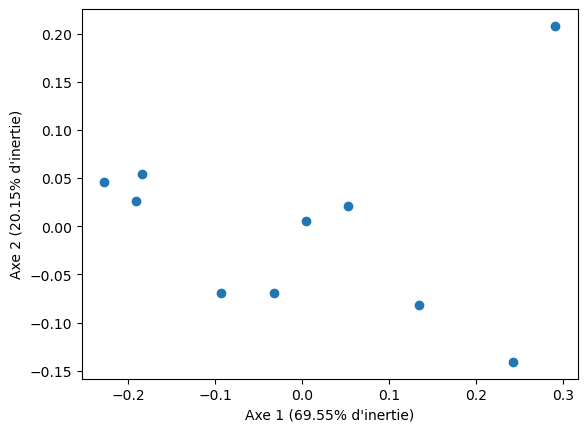

In [106]:
# Facteurs lignes apres projection
print("Facteurs colonnes de l'ACP_XL :")
facteurColonnes = pca_XC.transform(XC)
print(facteurColonnes)


# Graphique
plt.scatter(pca_XC.transform(XC)[:, 0], pca_XC.transform(XC)[:, 1])
plt.xlabel("Axe 1 ({}% d'inertie)".format(round(pca_XC.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel("Axe 2 ({}% d'inertie)".format(round(pca_XC.explained_variance_ratio_[1] * 100, 2)))
plt.show()

### 9) Visualiser  les  deux  nuages  dans  le  nouveau  plan  principal  (présentation  simultanée). 
### Etiqueter les profils-lignes et les profils-colonnes et Utiliser deux couleurs différentes afin de distinguer entre les deux nuages.

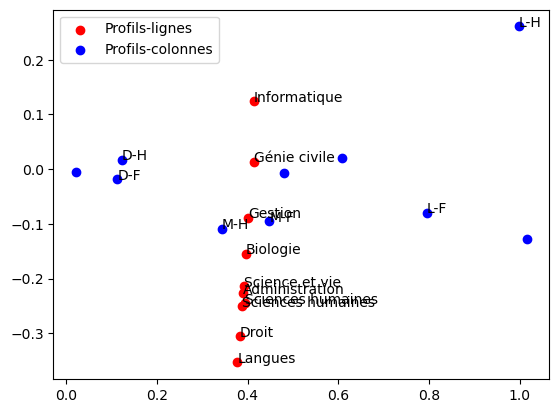

In [112]:
import matplotlib.pyplot as plt

# Matrice de corrélation
corr_matrix = np.corrcoef(K, rowvar=False)

# Les vecteurs propres et les valeurs propres
eig_vals, eig_vecs = np.linalg.eig(corr_matrix)

loading_matrix = eig_vecs * np.sqrt(eig_vals)

# Les coordonnées des profils-lignes dans le nouveau plan principal
coordonnees_lignes = np.dot(XL.T, eig_vecs[:, :2])

# Les coordonnées des profils-colonnes dans le nouveau plan principal
coordonnees_colonnes = np.dot(XC, loading_matrix[:, :2])

# Afficher le nuage de points
fig, ax = plt.subplots()

# afficher les profils-lignes dans le nuage de points, en utilisant une couleur rouge
ax.scatter(coordonnees_lignes[:,0], coordonnees_lignes[:,1], c='r')
for i, txt in enumerate(rows):
    ax.annotate(txt, (coordonnees_lignes[i,0], coordonnees_lignes[i,1]))

# afficher les profils-colonnes dans le nuage de points, en utilisant une couleur bleue
ax.scatter(coordonnees_colonnes[:,0], coordonnees_colonnes[:,1], c='b')
for i, txt in enumerate(columns):
    ax.annotate(txt, (coordonnees_colonnes[i,0], coordonnees_colonnes[i,1]))

# ajouter une légende pour distinguer les deux couleurs
ax.legend(['Profils-lignes', 'Profils-colonnes'])

plt.show()

### 10) Analyser et interpréter les résultats obtenus. 

### 11) Que signifie chaque axe ?